In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [20]:
df_raw = pd.read_csv("data/df_final_seg.csv")
df = df_raw.drop("Unnamed: 0", axis=1)
df.head()

,ID,Day,Incidence,Brand,Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,...,Settlement size,segment,spent,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,rfm_segment,cluster_segment
0,200000001,1,0,0,0,1.59,1.87,2.01,2.09,2.66,...,0,Working Class,0.0,0,0,0,0,0,Potential Loyalist,Working Class
1,200000001,11,0,0,0,1.51,1.89,1.99,2.09,2.66,...,0,Working Class,0.0,0,0,0,0,0,Potential Loyalist,Working Class
2,200000001,12,0,0,0,1.51,1.89,1.99,2.09,2.66,...,0,Working Class,0.0,0,0,0,0,0,Potential Loyalist,Working Class
3,200000001,16,0,0,0,1.52,1.89,1.98,2.09,2.66,...,0,Working Class,0.0,0,0,0,0,0,Potential Loyalist,Working Class
4,200000001,18,0,0,0,1.52,1.89,1.99,2.09,2.66,...,0,Working Class,0.0,0,0,0,0,0,Potential Loyalist,Working Class


In [5]:
df["total_pices_mean"] = (( df['Price_1'] + df['Price_2'] +    df['Price_3'] +     df['Price_4'] +  df['Price_5'] )/5)

In [6]:
X = pd.DataFrame( df["total_pices_mean"].values , columns=['Price'] ) 
y = df['Incidence']

In [7]:
from sklearn.linear_model import LogisticRegression
model_purch = LogisticRegression(solver = 'sag' , random_state=3)
model_purch.fit(X, y)

LogisticRegression(random_state=3, solver='sag')

In [8]:
print(model_purch.coef_)

[[-2.34793912]]


## Price Elasticity

**Formula**
```
Elasticity =  Beta * price(1-Probability(purchase) )
```

__Beta__: Model Coefficient

In [10]:
# цены для симуляций
print(df[["Price_1", "Price_2", "Price_3", "Price_4", "Price_5"]].min())
print(df[["Price_1", "Price_2", "Price_3", "Price_4", "Price_5"]].max())


Price_1    1.10
Price_2    1.26
Price_3    1.87
Price_4    1.76
Price_5    2.11
dtype: float64
Price_1    1.59
Price_2    1.90
Price_3    2.14
Price_4    2.26
Price_5    2.80
dtype: float64


In [11]:
price_rng = np.arange(0.5, 3.5, 0.01)
df_price_elast = pd.DataFrame(price_rng , columns=['price_range'])

In [12]:
preds = model_purch.predict_proba(df_price_elast["price_range"].values.reshape(-1 , 1))
prob_inci = preds[:][:, 1]

#Elasticity
prc_elast = model_purch.coef_[:, 0] * price_rng * (1 - prob_inci)

In [13]:
df_price_elast['price_elasticity'] = prc_elast
df_price_elast.head(5)

,price_range,price_elasticity
0,0.50,-0.096407
1,0.51,-0.100475
2,0.52,-0.104670
3,0.53,-0.108996
4,0.54,-0.113454


Text(0.5, 1.0, 'Price Elasticity')

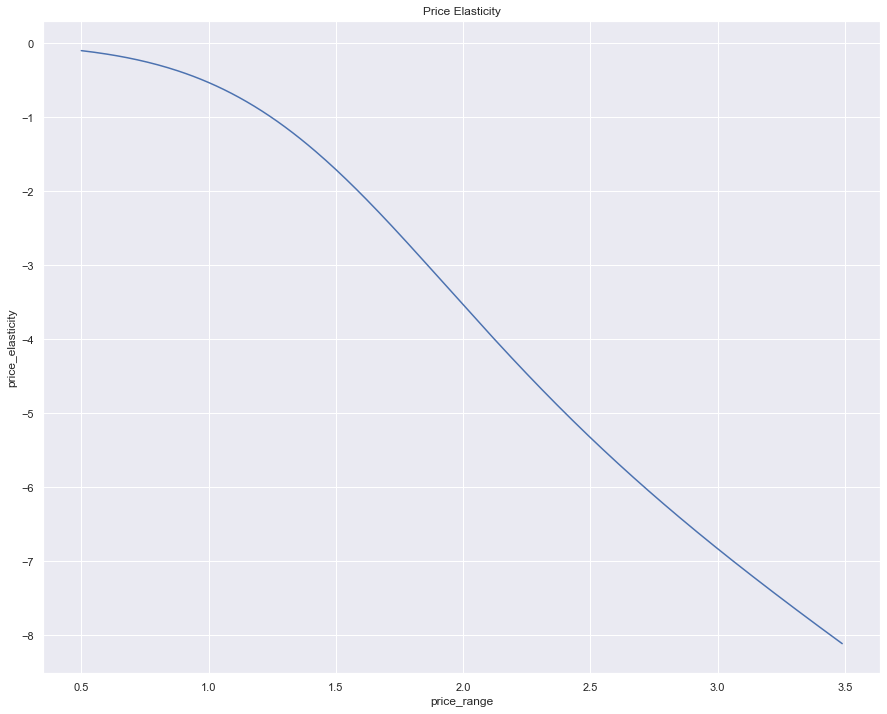

In [14]:
plt.figure(figsize = (15,12))
sns_plot = sns.lineplot(x = df_price_elast["price_range"], y = df_price_elast["price_elasticity"])
plt.title("Price Elasticity")

In [16]:
# в абсолютном значении
df_price_elast[abs(df_price_elast["price_elasticity"])>1]

,price_range,price_elasticity
75,1.25,-1.004714
76,1.26,-1.028447
77,1.27,-1.052544
78,1.28,-1.077002
79,1.29,-1.101822
...,...,...
295,3.45,-8.012488
296,3.46,-8.037737
297,3.47,-8.062951
298,3.48,-8.088132


# Cross Brand Elasticity

In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [22]:
df_raw = pd.read_csv("data/df_final_seg.csv")
df = df_raw.drop("Unnamed: 0", axis=1)
df.head()

,ID,Day,Incidence,Brand,Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,...,Settlement size,segment,spent,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,rfm_segment,cluster_segment
0,200000001,1,0,0,0,1.59,1.87,2.01,2.09,2.66,...,0,Working Class,0.0,0,0,0,0,0,Potential Loyalist,Working Class
1,200000001,11,0,0,0,1.51,1.89,1.99,2.09,2.66,...,0,Working Class,0.0,0,0,0,0,0,Potential Loyalist,Working Class
2,200000001,12,0,0,0,1.51,1.89,1.99,2.09,2.66,...,0,Working Class,0.0,0,0,0,0,0,Potential Loyalist,Working Class
3,200000001,16,0,0,0,1.52,1.89,1.98,2.09,2.66,...,0,Working Class,0.0,0,0,0,0,0,Potential Loyalist,Working Class
4,200000001,18,0,0,0,1.52,1.89,1.99,2.09,2.66,...,0,Working Class,0.0,0,0,0,0,0,Potential Loyalist,Working Class


In [23]:
df_brand_ch = df[df['Incidence']==1]

In [24]:
X = pd.DataFrame(df_brand_ch[["Price_1", "Price_2", "Price_3", "Price_4", "Price_5"]])
y = df_brand_ch["Brand"]

In [25]:
from sklearn.linear_model import LogisticRegression
model_brand  = LogisticRegression(random_state=3 , solver = 'sag', multi_class = 'multinomial')
model_brand.fit(X , y)

LogisticRegression(multi_class='multinomial', random_state=3, solver='sag')

In [26]:
df_brand_comp = pd.DataFrame()
prc_rng = np.arange(0.5 , 3.5 , 0.01)
df_brand_comp["price_range"] = prc_rng


In [29]:
def get_elastic_scores_brnd_ch(df, model, brand ):
    prc_rng = np.arange(0.5 , 3.5 , 0.01)
    prob = model.predict_proba(df)
    prob_brand = prob[:][:,(brand-1)]
    return ( (model.coef_[(brand-1),(brand-1)]) * (prc_rng) * (1 -prob_brand) )
    
    

### Эластичность от бренда (Бренд N2)


In [34]:
X_brand2= pd.DataFrame(index =prc_rng)

X_brand2["brand_1"] = df_brand_ch["Price_1"].mean()
X_brand2["brand_2"] =  prc_rng
X_brand2["brand_3"] = df_brand_ch["Price_3"].mean()
X_brand2["brand_4"] = df_brand_ch["Price_4"].mean()
X_brand2["brand_5"] = df_brand_ch["Price_5"].mean()

In [35]:
X_brand2

,brand_1,brand_2,brand_3,brand_4,brand_5
0.50,1.384559,0.50,2.006694,2.159658,2.654296
0.51,1.384559,0.51,2.006694,2.159658,2.654296
0.52,1.384559,0.52,2.006694,2.159658,2.654296
0.53,1.384559,0.53,2.006694,2.159658,2.654296
0.54,1.384559,0.54,2.006694,2.159658,2.654296
...,...,...,...,...,...
3.45,1.384559,3.45,2.006694,2.159658,2.654296
3.46,1.384559,3.46,2.006694,2.159658,2.654296
3.47,1.384559,3.47,2.006694,2.159658,2.654296
3.48,1.384559,3.48,2.006694,2.159658,2.654296


In [36]:
df_brand_comp["own_b2"] = get_elastic_scores_brnd_ch(X_brand2 , model_brand , 2)

C:\Users\ArtSe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


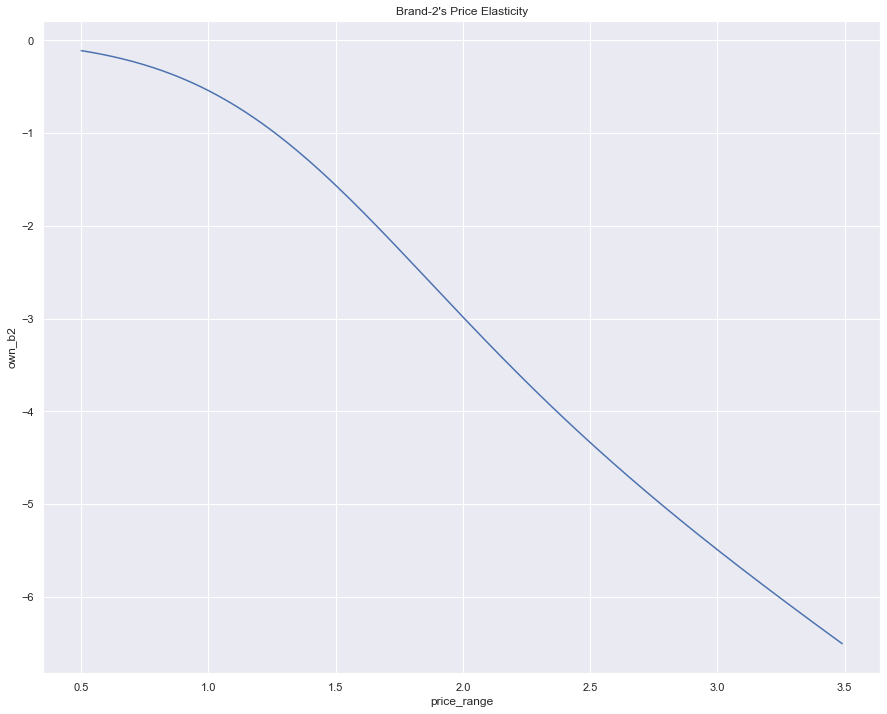

In [37]:
plt.figure(figsize = (15,12))
sns.lineplot(df_brand_comp["price_range"] , df_brand_comp["own_b2"])
plt.title("Brand-2's Price Elasticity")
plt.show()

## Cross Price Elasticity по Brand 2 и Brand 1

In [39]:
def get_elastic_scores_brnd_ch_cross(df, model, brand_m , brand_c ):
    prc_rng = np.arange(0.5 , 3.5 , 0.01)
    
    prob = model.predict_proba(df)
    
    prob_brand = prob[:][:,(brand_c-1)]
    
    beta = (-1*(model.coef_[(brand_m-1),(brand_m-1)]) )
    
    return (  (beta)* (prc_rng) * (prob_brand) )
    
    

In [40]:
X_brand1_cross= pd.DataFrame(index =prc_rng)
X_brand1_cross["brand_1"] =  prc_rng
X_brand1_cross["brand_2"] = df_brand_ch["Price_2"].mean()
X_brand1_cross["brand_3"] = df_brand_ch["Price_3"].mean()
X_brand1_cross["brand_4"] = df_brand_ch["Price_4"].mean()
X_brand1_cross["brand_5"] = df_brand_ch["Price_5"].mean()

In [41]:
X_brand1_cross.head()

,brand_1,brand_2,brand_3,brand_4,brand_5
0.50,0.50,1.764717,2.006694,2.159658,2.654296
0.51,0.51,1.764717,2.006694,2.159658,2.654296
0.52,0.52,1.764717,2.006694,2.159658,2.654296
0.53,0.53,1.764717,2.006694,2.159658,2.654296
0.54,0.54,1.764717,2.006694,2.159658,2.654296


In [42]:
df_brand_comp["cross_b1"] = get_elastic_scores_brnd_ch_cross(X_brand1_cross , model_brand , 2,1)

C:\Users\ArtSe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ArtSe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


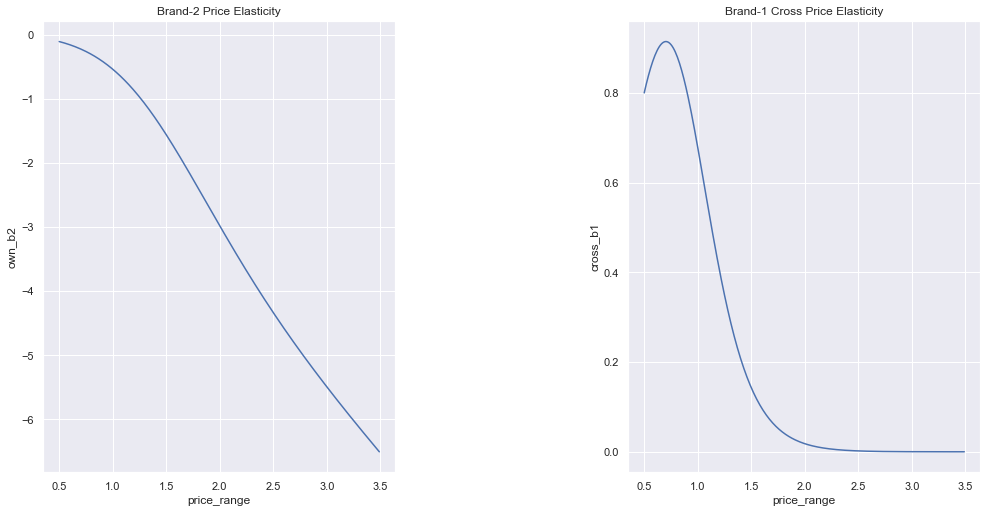

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=3.5)
fig.set_figheight(10)
fig.set_figwidth(18)

splot1 = sns.lineplot(df_brand_comp["price_range"] , df_brand_comp["own_b2"] , ax=axes[0] , palette="Blues_d")
axes[0].set_title("Brand-2 Price Elasticity")

splot2 = sns.lineplot(df_brand_comp["price_range"] , df_brand_comp["cross_b1"] , ax=axes[1] , palette="Blues_d")
axes[1].set_title("Brand-1 Cross Price Elasticity")


plt.show()
        